# Laboratory Four: Breadth First Search (BFS) vs Depth First Search (DFS)
***Shn Kerby C. Dolamos*** 

This laboratory report examines two graph traversal algorithms: **Breadth-First Search (BFS)** and **Depth-First Search (DFS)**. Their performance is evaluated based on the time taken to traverse randomly generated directed graphs. The analysis is conducted using graph sizes ranging from **10,000** to **100,000** vertices, increasing in increments of **10,000**.

The implementation uses a common graph structure with adjacency lists stored as vectors. For each test case, a graph with twice as many edges as vertices is randomly generated. The BFS implementation uses a queue-based approach, marking vertices as visited when they're discovered and before being added to the queue. The DFS implementation uses an iterative stack-based approach rather than recursion to handle large graphs, with vertices marked as visited only when they're popped from the stack.

# Traversal Time Graph

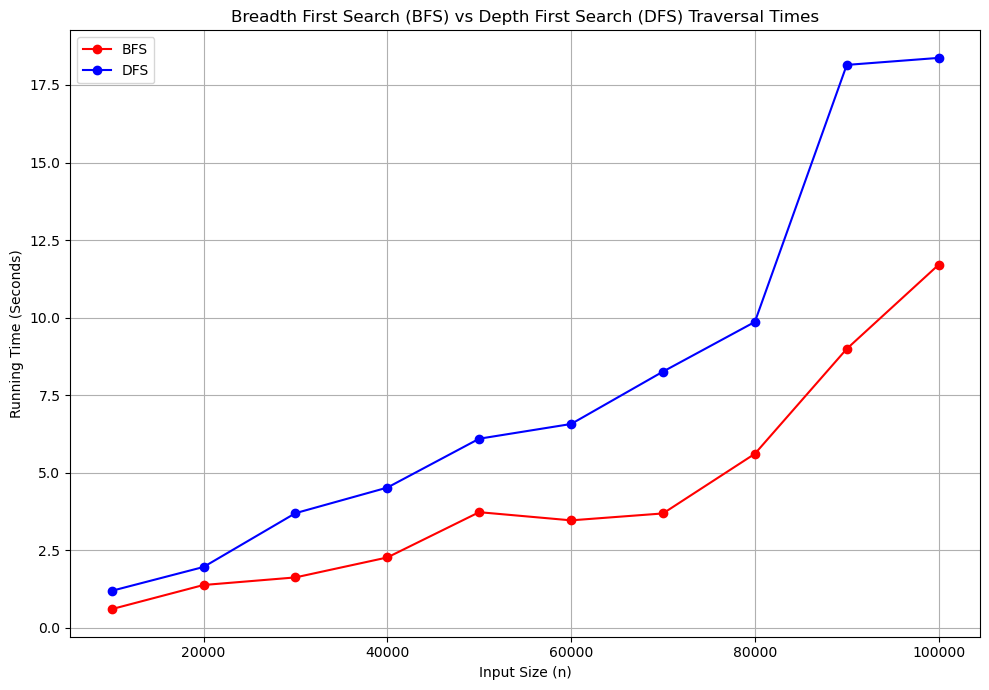

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10000, 100001, 10000)

# Read data from files
bfs = np.loadtxt('BFS_Traversal_Times.txt')  
dfs = np.loadtxt('DFS_Traversal_Times.txt')       



plt.figure(figsize = (10, 7))

plt.plot(x, bfs, marker='o', c='r', label='BFS')
plt.plot(x, dfs, marker='o', c='b', label='DFS')

plt.title("Breadth First Search (BFS) vs Depth First Search (DFS) Traversal Times")
plt.xlabel("Input Size (n)")
plt.ylabel("Running Time (Seconds)")

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

# Data Gathered

| Input Size | BFS Time (ms) | DFS Time (ms) |
|------------|----------------|----------------|
| 10,000     | 0.6040000000   | 1.1941000000   |
| 20,000     | 1.3826000000   | 1.9632000000   |
| 30,000     | 1.6272000000   | 3.6977000000   |
| 40,000     | 2.2705000000   | 4.5227000000   |
| 50,000     | 3.7301000000   | 6.0981000000   |
| 60,000     | 3.4667000000   | 6.5727000000   |
| 70,000     | 3.6895000000   | 8.2610000000   |
| 80,000     | 5.6123000000   | 9.8630000000   |
| 90,000     | 8.9946000000   | 18.1474000000  |
| 100,000    | 11.7061000000  | 18.3735000000  |


# Analysis

Despite both BFS and DFS having the same theoretical time complexity of O(V + E), the performance difference in this experiment is noticeable, especially as the graph size increases. BFS consistently performed faster than DFS across all input sizes, with DFS showing a significant increase in execution time as the graph grew. At smaller input sizes, the difference was minimal, but as the number of vertices and edges increased, the gap widened.

This specific implementation shows that DFS behaves slower than BFS than the normal since: 

1. The DFS implementation performs redundant visited checks.

2. It uses reverse iteration, specifically this part in dfs:
    ```cpp
    for (auto it = adjLists[currVertex].rbegin(); it != adjLists[currVertex].rend(); ++it) 
    {
        if (!visited[*it]) 
            s.push(*it);
    }

3. The visitation pattern of marking vertices as visited only after popping from the stack creates more stack operations

4. The two-phase checking approach in DFS (first when popping, then when examining neighbors) is less efficient than BFS's single-phase approach

***Even though both algorithms have the same time complexity of O(V + E), the way they were implemented slightly affected their performance.***